### Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.

Help the company to carry out their study with the help of data provided.

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
data.shape

(22, 5)

In [6]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [7]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


#### ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

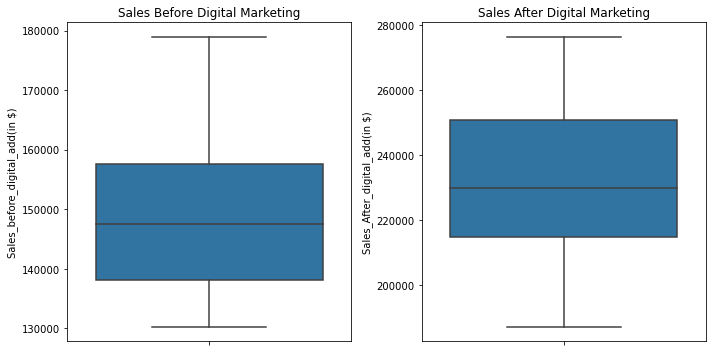

In [33]:

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot( y = "Sales_before_digital_add(in $)" , data = data, ax = ax1)
ax1.set(title = "Sales Before Digital Marketing")
sns.boxplot( y = "Sales_After_digital_add(in $)" , data = data, ax = ax2);
ax2.set(title = "Sales After Digital Marketing")
plt.tight_layout()




From the graph it is clear that, after digital marketing there is a huge rise in sales.

##### Hypothesis Testing

Setting Hypothesis

H0: No difference in sales after digital marketing compared to sales before digital marketing

H1: Increase in sales after digital marketing

Alpha is taken as:0.05



In [19]:
# import ttset module
from scipy.stats import ttest_ind

In [20]:
before_Digital=data[["Sales_before_digital_add(in $)"]]
after_Digital=data[["Sales_After_digital_add(in $)"]]
alpha=0.05

In [34]:
_,p = ttest_ind(before_Digital,after_Digital)
print("p value :", p)
if p > alpha:
    print("Fail to reject the Null Hypothesis H0.")
else:
    print('Reject the Null Hypothesis,H0')

p value : [2.61436801e-16]
Reject the Null Hypothesis,H0


Reject the null hypothesis H0, which means it accepts the alternative hypothesis, ie, sales increased after digital marketing.

##### ● The company needs to check whether there is any dependency between thefeatures “Region” and “Manager”.

##### Hypothesis Testing

Setting Hypothesis

H0: No dependency between manager and region

H1: Has dependency between manager and region

Alpha is taken as:0.05


Crosstable for the relation between manager and region

In [41]:
ctable=pd.crosstab(data['Region'],data['Manager'])
ctable

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


Calculating Chi square value, pvalue, degree of Freedom

In [38]:
#import chi square module
from scipy.stats import chi2_contingency
alpha=0.05

In [39]:
stat,p,dof,expected=chi2_contingency(ctable)
print('p value:',p)
if p> alpha:
    print ('fail to reject the Null Hypothesis,H0')
else:
    print('Reject the Null Hypothesis,H0')

p value: 0.5493991051158094
fail to reject the Null Hypothesis,H0


Accept the null hypothesis, H0. Hence no dependency between manager and region

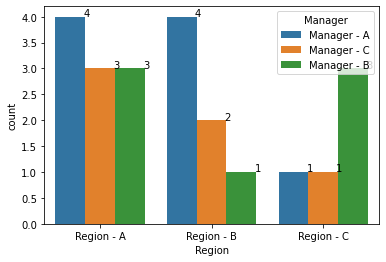

In [46]:
ax=sns.countplot(data=data,x='Region',hue='Manager')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()



From the graph it is clear that, there is no dependency between region and managers. 